# (PSL) Project 3 Report: Movie Review Sentiment Analysis

Arjun Kshirsagar, 12/09/2024

Citations: https://huggingface.co/distilbert/distilbert-base-uncased, https://huggingface.co/docs/transformers/en/model_doc/auto 

This notebook discusses the technical details of the sentiment classification model, including data preprocessing and other key aspects of model implementation.
It reports the AUC of predictions on each of the 5 test datasets, the execution time of the code, and the specifications of the computer system used for each of the 5 splits. This report also provides a detailed explanation of the interpretability approach, including all the necessary code within this file to ensure reproducibility of results.

## Section 1: Technical Report

This sentiment classification model uses OpenAI word embeddings to build a binary model, where the binary reponse label represents sentiment of the movie review (1 for positive, 0 for negative). Using the Pandas Python module, the training data is loaded and separated into a feature matrix of 1536 word embeddings and a binary response vector representing sentiment labels. No preprocessing is done on the word embeddings matrix, and all 1536 embeddings are used as features in the model. 

Next, I use Scikit-Learn modules to create a model pipeline, first standardizing the features using the StandardScaler() class, then a LogisticRegression() model with ElasticNet penalty. The parameters of the LogisticRegression() are set to 0.01 for regularization strength C (inverted regularization parameter), and 0.1 for the L1_Ratio of ElasticNet (mixing ratio of Lasso to Ridge regularizations). The C and L1_ratio hyperparameters were tuned in a previous step with GridSearchCV(), optimizing cross-validation AUC over multiple C and L1_ratio values.

This model pipeline of StandardScaler() and LogisticRegression() with ElasticNet is then trained on the features and response from the training set. The unlabeled test data is loaded and the trained model is used to predict for each review the probability of a positive sentiment label. In practice, these probabilities can be converted to binary labels, where a probability greater then 0.5 (50%) indicates a positive sentiment label (1), and negative (0) otherwise.

The computer system I used was a 2019 Macbook Air, 1.6 GHz Dual-Core Intel Core i5 Processor, with 8 GB of memory.

The image below displays for each split the AUC for test data predictions and the execution time. Clearly, the test AUC is above the threshold 0.986 for each split and the runtime is roughly 1.5 minutes on average.

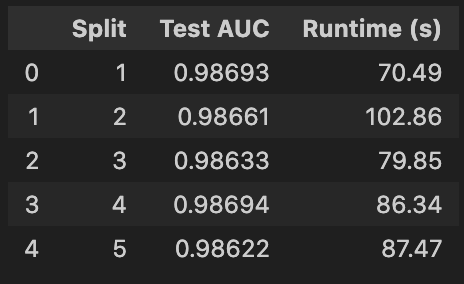

## Section 2: Interpretability

In this section, I attempt to break down some reviews and transform them using a different embedding model, BERT. BERT is available for free open-source use on Hugging Face. The datasets and pickled model which are loaded from online have been precomputed, with a link to the code that computes these objects:

In [318]:
import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings('ignore')


# Load pretrained model. This is a Logistic Regression model with Elastic Net penalty and standard scaling. 
# It was trained previously on Split 1 training data. Open the pkl in binary read mode and load the model.
# with open('split_1_model.pkl', 'rb') as f:
#     model_pipeline = pickle.load(f)
import requests
from io import BytesIO
import pickle

filepath = 'https://raw.githubusercontent.com/arjun-100/pslF24-sent-analysis/main/split_1_model.pkl'
resp = requests.get(filepath)
if resp.status_code == 200:
    model_bytes = BytesIO(resp.content)
    model_pipeline = pickle.load(model_bytes)


Next, I used the Split 1 test data to predict the probability of a positive sentiment for each review, using this pretrained model above. 

I have randomly sampled 10 reviews from the test datam with a random seed of 287: 5 reviews with a positive sentiment prediction (prob > 0.5), and 5 with negative. I saved this dataframe of 10 random test reviews, each with a review id, the text of the original review, 1536 OpenAI embeddings, and finally the prediction or probability of positive label ('review_pred_og').

Below, I read in this sample reviews table from online, and display it.

In [319]:
# Load 10 review samples.
sample_df = pd.read_csv('https://raw.githubusercontent.com/arjun-100/pslF24-sent-analysis/refs/heads/main/sample_reviews.csv')

# Move review_pred_og to before the embeddings
rev_pred_og = sample_df.pop('review_pred_og')
sample_df.insert(2, 'review_pred_og', rev_pred_og)

sample_df


,id,review,review_pred_og,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_1527,embedding_1528,embedding_1529,embedding_1530,embedding_1531,embedding_1532,embedding_1533,embedding_1534,embedding_1535,embedding_1536
0,23550,I have no idea why everyone hates this movie t...,0.375972,0.009314,0.027561,-0.033033,0.002697,-0.030260,0.000725,0.011062,...,0.011351,-0.008970,0.016529,-0.000176,-0.031365,0.024935,0.000204,0.000956,0.053550,0.011510
1,3989,This frothy romantic comedy is based on the ki...,0.104963,0.002660,0.054119,-0.049937,0.000723,0.015806,0.021488,0.008282,...,-0.002225,-0.010489,0.032466,-0.004505,-0.010469,0.010992,-0.014046,-0.010194,0.020663,-0.019424
2,35823,Absolutely the most boring movie I have ever s...,0.000032,-0.015065,0.087090,-0.027131,-0.017138,-0.044519,-0.017750,0.043470,...,0.026382,0.027431,0.023097,-0.017201,-0.015976,0.013266,-0.003548,-0.001421,0.015577,-0.010699
3,47346,This movie really has no beginning or end. And...,0.143668,-0.012382,0.046688,-0.002801,0.005538,-0.027124,-0.025134,0.048848,...,0.017036,-0.006763,-0.032707,-0.005580,-0.023742,0.014933,0.010827,-0.022335,0.007459,0.015416
4,27891,There's something wonderful about the fact tha...,0.989934,-0.014205,0.070241,-0.050658,0.015836,-0.010389,0.048544,0.058565,...,0.015894,-0.050980,0.019732,-0.043372,-0.011165,-0.002554,0.015618,0.023743,0.021548,-0.013929
5,20324,This is another one of Hitchcock's highest rat...,0.999286,-0.042470,0.059787,-0.027573,-0.036930,-0.048483,0.011216,0.030193,...,0.017554,-0.034809,-0.005764,0.000821,0.002444,-0.016244,-0.048284,-0.003094,-0.010206,-0.029519
6,16055,It has been recorded that John Ford made the \...,0.986137,-0.028624,0.005944,-0.028031,0.002944,-0.034743,-0.051035,0.057675,...,0.024355,0.029027,0.061612,0.002403,-0.005262,-0.016850,-0.013506,-0.008330,0.005798,-0.009907
7,4807,I was shocked at how bad it was and unable to ...,0.007358,-0.070205,0.024966,-0.079197,0.004661,-0.037521,-0.029712,0.037863,...,0.000337,-0.012759,0.000596,-0.002406,-0.025360,-0.013975,0.009584,0.027372,0.015264,-0.002297
8,22021,I can only agree with many observers that Traf...,0.998581,0.000501,0.024404,-0.110551,-0.012036,0.026769,-0.010131,-0.003372,...,0.030271,0.027331,0.021361,-0.014675,-0.013972,-0.033467,-0.007255,0.016082,0.015557,-0.031166
9,37201,I am writing this after just seeing The Perfec...,0.998772,0.007497,0.032988,-0.042984,0.016226,-0.009667,-0.021385,-0.011798,...,-0.006679,0.001334,0.011945,-0.001157,0.002931,0.012474,0.013747,0.025029,-0.012615,0.003246


I split each review into sentences. Each sentence is contained in a separate row, but identified by the review and review id it belongs to.

In [320]:
# Split the 10 reviews by sentence, display the table
# Separate embeddings matrix (10 x 1536) and other columns
interp_df_only_embed = sample_df.drop(columns=['id', 'review', 'review_pred_og'])
interp_df_no_embed = sample_df[['id', 'review', 'review_pred_og']]

# Function to split review into sentences
def by_sentence(review):
    return re.split(r'(?<=[.!?])\s*(?=\w)', review)

# From reviews, remove <br> and extra spaces
interp_df_no_embed.review = interp_df_no_embed.review.str.replace(r'<.*?>', ' ', regex=True).str.strip()
# Apply split function to 'review' column
interp_df_no_embed['sentence'] = interp_df_no_embed.review.apply(by_sentence)

# Explode the 'sentence' column (each row is a sentence), remove extra spaces
interp_df_split = interp_df_no_embed.explode('sentence')
interp_df_split.sentence = interp_df_split.sentence.str.strip()

interp_df_split


,id,review,review_pred_og,sentence
0,23550,I have no idea why everyone hates this movie t...,0.375972,I have no idea why everyone hates this movie t...
0,23550,I have no idea why everyone hates this movie t...,0.375972,Cause seriously I think it should have had a s...
1,3989,This frothy romantic comedy is based on the ki...,0.104963,This frothy romantic comedy is based on the ki...
1,3989,This frothy romantic comedy is based on the ki...,0.104963,"In the case of May-September attachments, doub..."
1,3989,This frothy romantic comedy is based on the ki...,0.104963,And the younger is most likely looking for the...
...,...,...,...,...
9,37201,I am writing this after just seeing The Perfec...,0.998772,I do have one qualm about the movie though - w...
9,37201,I am writing this after just seeing The Perfec...,0.998772,A person of 0 T4 cells would look quite ill - ...
9,37201,I am writing this after just seeing The Perfec...,0.998772,"A small gripe, but one that makes it a bit les..."
9,37201,I am writing this after just seeing The Perfec...,0.998772,"Despite that one small gripe, The Perfect Son ..."


Now, I load the BERT embeddings of these sentences. These have been precalculated using an open-source BERT model, and the embeddings are loaded from online. 

I also load the W matrix. This is a transformation matrix from 768 BERT embeddings to 1536 OpenAI embeddings. Since our binary classifier is built on OpenAI embeddings, we must make this conversion. The W_matrix was computed using a sample of 800 reviews from the test set, and paired with the BERT embeddings for those reviews.

Finally, I use the model to predict the probability of each sentence having a positive label, and display the resulting table.

In [321]:
# Load the Bert embeddings of this set of sentences
sample_berts = pd.read_csv('https://raw.githubusercontent.com/arjun-100/pslF24-sent-analysis/refs/heads/main/sample_berts.csv').iloc[:, 1:]

# Load the W matrix csv, transform Bert to OpenAI
W_matrix = pd.read_csv('https://raw.githubusercontent.com/arjun-100/pslF24-sent-analysis/refs/heads/main/W_matrix.csv')
sample_berts_to_openai = np.array(sample_berts) @ np.array(W_matrix)

# Run through pretrained model to predict sentiment for each sentence
sentence_preds = model_pipeline.predict_proba(sample_berts_to_openai)[:, 1]

# Join these with review-sentence table
interp_df_split['sentence_pred'] = sentence_preds
# Rename some columns and sort values by review_prob then by sentence_prob (essentially, reviews ordered 
# most-positive to least-positive, and each review's sentences ordered most- to least-positive)
df_full = interp_df_split.rename(columns={'id':'review_id', 'review_pred_og':'review_pred'})\
    .sort_values(['review_pred', 'sentence_pred'], ascending=False)

df_full


,review_id,review,review_pred,sentence,sentence_pred
5,20324,This is another one of Hitchcock's highest rat...,0.999286,This is another one of Hitchcock's highest rat...,0.999892
5,20324,This is another one of Hitchcock's highest rat...,0.999286,Another fast moving Hitchcock movie with lots ...,0.999674
5,20324,This is another one of Hitchcock's highest rat...,0.999286,This is a tale of two men who meet on a train ...,0.960509
5,20324,This is another one of Hitchcock's highest rat...,0.999286,One of them (Robert Walker) takes it seriously...,0.073169
5,20324,This is another one of Hitchcock's highest rat...,0.999286,Not a movie to be missed- it is a shame that n...,0.070814
...,...,...,...,...,...
2,35823,Absolutely the most boring movie I have ever s...,0.000032,"Maybe it was the director's fault----whatever.""",0.000416
2,35823,Absolutely the most boring movie I have ever s...,0.000032,Boring!,0.000048
2,35823,Absolutely the most boring movie I have ever s...,0.000032,boring!,0.000048
2,35823,Absolutely the most boring movie I have ever s...,0.000032,boring!,0.000048


The new column, 'bert_pred', are the probabilities of positive review for each sentence, by review.

Below is a dataframe displaying key information for each review. The columns are as follows:
* '**review_id**': The unique review ID.
* '**review_pred**': The probability of a positive label for the review.
* '**sentence_count**': The number of sentences in the review.
* '**pos_sentence_count**': The number of sentences which are labeled positive (have a > 50% probability of positive sentiment).
* '**pos_sentence_pct**': The proportion of sentences which are labeled positive ('pos_sentence_count' / 'sentence_count').
* '**avg_pos_label**': The average probability of a positive label (how positive is the average sentence in this review).


In [322]:
breakdown_df = df_full.groupby('review_id').agg(
    review_pred=('review_pred', 'first'),
    sentence_count=('sentence', 'count'),
    pos_sentence_count=('sentence_pred', lambda x: (x > 0.5).sum()),
    pos_sentence_pct=('sentence_pred', lambda x: (x > 0.5).mean()),
    avg_pos_label=('sentence_pred', 'mean')
    ).sort_values('review_pred', ascending=False)

breakdown_df


,review_pred,sentence_count,pos_sentence_count,pos_sentence_pct,avg_pos_label
review_id,,,,,
20324,0.999286,5,3,0.600000,0.620811
37201,0.998772,8,6,0.750000,0.731447
22021,0.998581,6,5,0.833333,0.810995
27891,0.989934,5,4,0.800000,0.835328
16055,0.986137,11,8,0.727273,0.711279
23550,0.375972,2,0,0.000000,0.154725
47346,0.143668,7,4,0.571429,0.497076
3989,0.104963,11,6,0.545455,0.526086
4807,0.007358,3,1,0.333333,0.369225


To better visualize trends, I next create a scatterplot of 'pos_sentence_pct' and 'review_pred'. Across these 10 reviews, is there a correlation between probabilty of overall positive label and proportion of its sentences labeled positive?

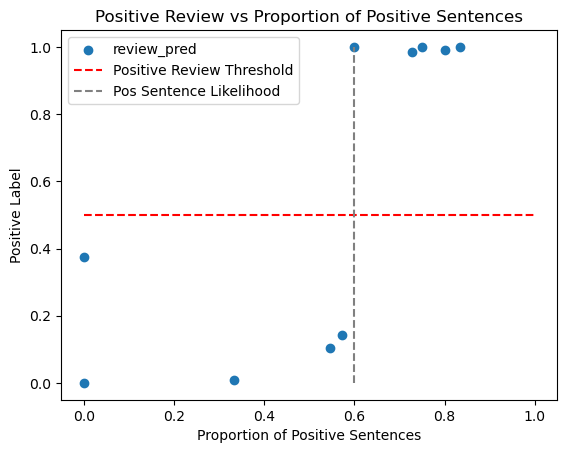

In [323]:
import matplotlib.pyplot as plt

plt.scatter('pos_sentence_pct', 'review_pred', data=breakdown_df)
plt.hlines(y=0.5, xmin=0, xmax=1, colors='red', linestyles='dashed', label='Positive Review Threshold')
plt.vlines(x=0.6, ymin=0, ymax=1, colors='grey', linestyles='dashed', label='Pos Sentence Likelihood')
plt.xlabel('Proportion of Positive Sentences')
plt.ylabel('Positive Label')
plt.title('Positive Review vs Proportion of Positive Sentences')
plt.legend()
plt.show()


In the plot above, the 10 reviews are represented by the 10 blue points. The horizontal red dashed line is the 50% positivity threshold; a review above this line will be labeled as positive, otherwise negative. The vertical grey line is a threshold of 0.6, representing reviews where 60% of sentences are labeled positive. This vertical line roughly separates the data, although one of the positive reviews lies exactly on the line, but this is a meaningful threshold. 

In sum, it appears from my 10-review sample that **if a review has at least 60% of its sentences labeled positive**, it may be labeled positive as a whole review. This is one possible interpretation of the sentiment classification model's justifications.

Next, I create a scatterplot of 'avg_pos_label' and 'review_pred'. Is there a correlation between probabilty of overall positive label and average probability of a positive label?

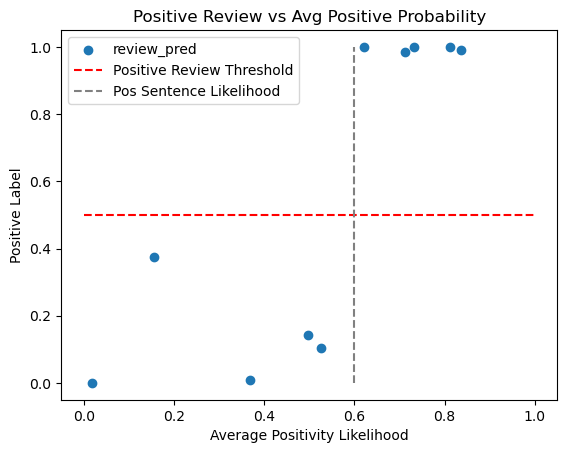

In [324]:
plt.scatter('avg_pos_label', 'review_pred', data=breakdown_df)
plt.hlines(y=0.5, xmin=0, xmax=1, colors='red', linestyles='dashed', label='Positive Review Threshold')
plt.vlines(x=0.6, ymin=0, ymax=1, colors='grey', linestyles='dashed', label='Pos Sentence Likelihood')
plt.xlabel('Average Positivity Likelihood')
plt.ylabel('Positive Label')
plt.title('Positive Review vs Avg Positive Probability')
plt.legend()
plt.show()


Again, in the plot above, the horizontal red dashed line is the 50% positivity threshold, above which a review will be labeled as positive, otherwise negative. The vertical grey line is a threshold of 0.6, representing reviews whose sentences on average have a 60% probability of being positive. This vertical line separates this data, so it appears from my 10-review sample that **if a review's average sentence has at least a 60% probability of being positive**, it can be labeled positive as a whole review. This is another possible interpretation of the sentiment classifier's approach.

Overall, my approach to creating a sentiment classifier model of movie reviews has been interpreted and clarified somewhat through my analysis. By taking a sample of 10 test reviews and modeling the positive label probability of the *whole review* and its *individual sentences*, we can infer something about the inner workings of the model. 

Specifically, if a review

* has at least 60% of its sentences labeled positive, or 
* the average probability of positive label across its sentences is at least 60%,

the model will label the review as positive, or predict at least a 50% probability of a positive label. More analysis can be done, however; taking a different sample of reviews, a larger sample, a different approach to mapping BERT embeddings to OpenAI embeddings, or perhaps breaking up a review in a different way (by word, by phrase, etc) rather than by sentence. In conclusion, this kind of interpretability analysis can help unravel the inner workings of a complex language model and sentiment analysis algoithm.